### This project is about customer churn prediction. 
* Churn quantifies the number of customers unsubscribing/canceling the service.In this project, we would like to build a model which can help us identify the intention of customers to leave us in future. 

* To solve the problem of predicting customer churn, we will analyze the past data to study the characteristics/behaviour of the customers before they churned.

* The dataset we will be using is Telcom Customer Churn Dataset from kaggle (https://www.kaggle.com/blastchar/telco-customer-churn)

**CAPSTONE** **PROJECT** **FOR** **FINAL** **ASSIGNMENT**

**GUIDED** **BY**:
**YBIF** **FOUNDATION**

**PREPARED** **BY**: **MEET** **SAVANI** 

### Lets start the Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

About the data:
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
* The raw data contains 7043 rows (customers) and 21 columns (features).
* The “Churn” column is our target.

The columns are as follows:
* customerID - Customer ID
* gender - Whether the customer is a male or a female
* SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
* Partner - Whether the customer has a partner or not (Yes, No)
* Dependents - Whether the customer has dependents or not (Yes, No)
* tenure - Number of months the customer has stayed with the company
* PhoneService - Whether the customer has a phone service or not (Yes, No)
* MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract - The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - The amount charged to the customer monthly
* TotalCharges - The total amount charged to the customer
* Churn - Whether the customer churned or not (Yes or No)

In [6]:
# Loading the data in pandas
df = pd.read_csv(r'/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
print('Percentage of churned customers: ', round(((1869 / (5174+1869)) *100),2))

Percentage of churned customers:  26.54


In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
# Converting datatypes as TotalCharges is not float 
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Data has 11 missing values for TotalCharges variable and hence needs to be removed

In [14]:
df = df.dropna()

In [15]:
round(df[['tenure','MonthlyCharges','TotalCharges']].describe(),1)

,tenure,MonthlyCharges,TotalCharges
count,7032.0,7032.0,7032.0
mean,32.4,64.8,2283.3
std,24.5,30.1,2266.8
min,1.0,18.2,18.8
25%,9.0,35.6,401.4
50%,29.0,70.4,1397.5
75%,55.0,89.9,3794.7
max,72.0,118.8,8684.8


* We can clearly see that the average time that a customer sticks with the telcom is 32 months.

* Average monthly charges are 64.8 & the average total Charges are 2283.3.

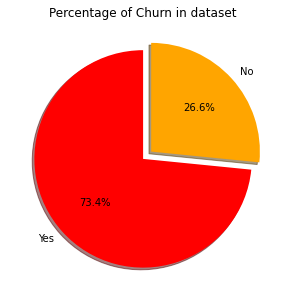

In [16]:
# lets visualize it with a pie chart
data_size = df.Churn.value_counts(sort=True)
colors = ['red','orange']
rcParams['figure.figsize'] = 5,5

# For plotting
labels = 'Yes', 'No'
explode = (0, 0.1) 
plt.pie(data_size, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of Churn in dataset')
plt.show()

As we can see from our data of around 7043 entries, only 26.5% of the customers have churned out and the other 73.5% have stayed with the company.

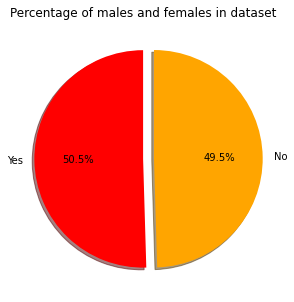

In [17]:
data_size = df.gender.value_counts(sort=True)
colors = ['red','orange']
rcParams['figure.figsize'] = 5,5

# For plotting
labels = 'Yes', 'No'
explode = (0, 0.1) 
plt.pie(data_size, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of males and females in dataset')
plt.show()

We see that our data has almost equal number of males and females as customers.

Lets plot the data across the tenure and Churn

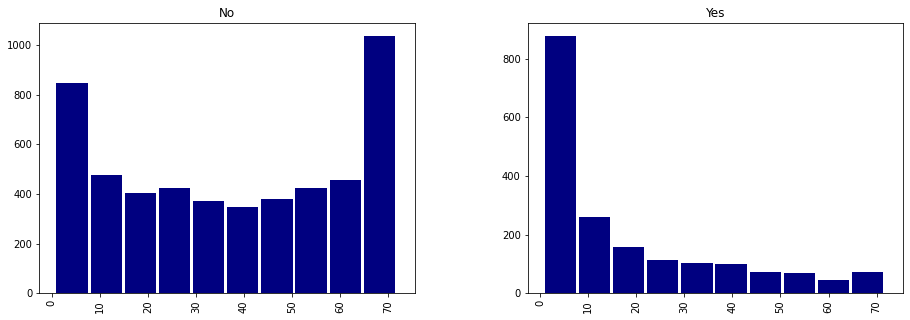

In [18]:
tenure_churn =df['tenure'].hist(by=df['Churn'],figsize=(15,5),width=6.5, color='navy' )
plt.show()

* The graph on the left is about number of customers who didn't churn and how many months of service they had. On the other hand, the graph on the right is about the number of customers who churned as the tenure starts to increase.
* Number of customers who don't churn starts to decrease when the service reaches 30 or 40 months and starts to increase when service reaches 50 to 70 months.
* Number of customers who churn are high in the initial months 0 to 8 and then starts to decrease as the service reaches 70 months.

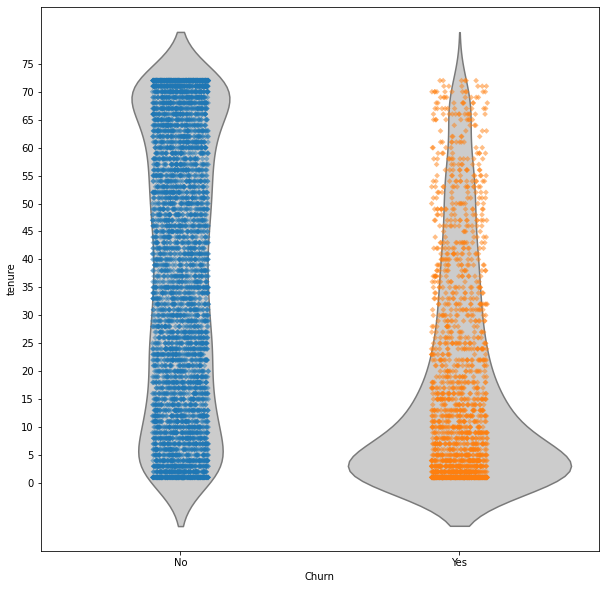

In [19]:
plt.subplots(figsize=(10,10))
x = sns.violinplot(x="Churn", y="tenure", data=df, inner=None,color="0.8")
x = sns.stripplot(x="Churn", y="tenure", data=df, jitter=True, marker="D", size=4, alpha=0.5,edgecolor="gray")
x.set_yticks(np.arange(0,80,5))
x


* We can see in the first violinplot, the bars are highest above 70 months & then less than 10 months. This may mean that most customers who stay with the company are either new ones or ones that have been with the company for many years, i.e the loyal cusotmers.

* On the other hand, if we look at customers who churned, they are the highest in the first few months.



### Next step is data preprocessing and feature engineering
In this step, we will preprocess the data because if the data is not good, our predictions will not be good. So, we will be doing the following:
* Dropping irrelevant data
* Handling missing data
* Converting data to numerical format for model preparation

In [20]:
# Dropping irrelavant data because customer id is unique and not useful
df.drop('customerID', axis=1, inplace=True)

In [21]:
# Handling missing data
df.isnull().values.any()

False

The data contains only 3 features which are continuous. The other features of the data are categorical. For preparing the model, we need to encode the categorical data.

We do this using the Label Encoder package.

In [22]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1


# Correlation Analysis
 - To see the correlation between variables, we will use Pearson coefficient and use heatmap for visualization

In [23]:
df.corr(method="pearson")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013929,-0.000579,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219210,0.107202,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.107482,0.342319,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.105948,0.081626,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.267182,0.871680,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.271652,0.085934,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.445006,0.463532,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.243738,-0.209762,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.044322,0.246996,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.141519,0.352453,-0.195290


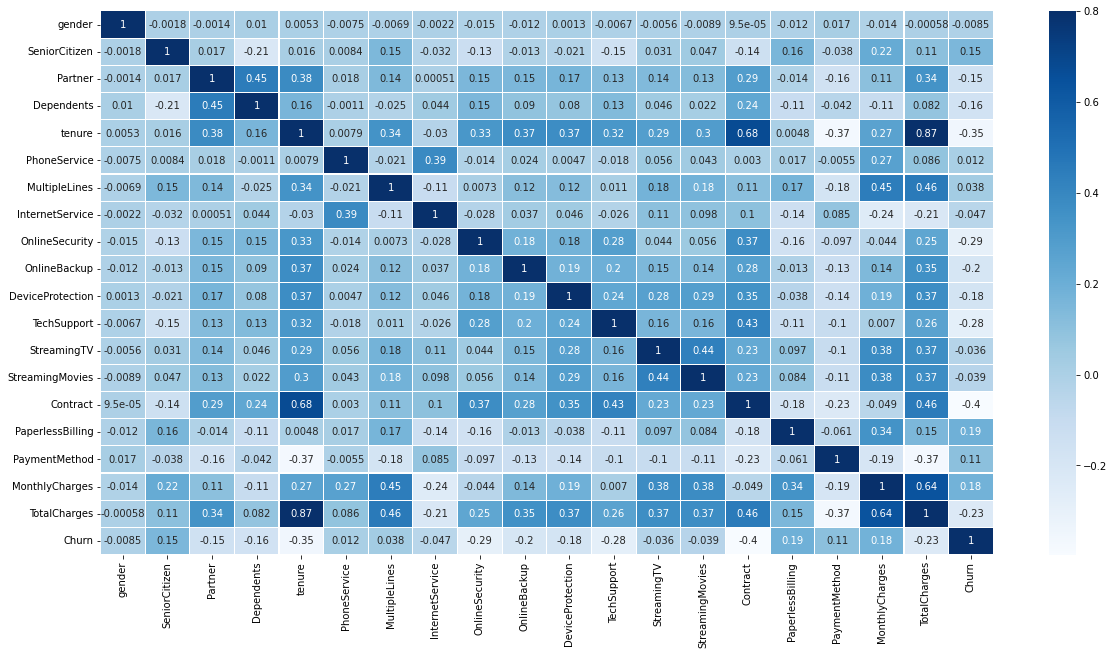

In [24]:
# Correlation Plot
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
sns.heatmap(corr_matrix, linewidths=0.1, cmap = plt.cm.Blues, linecolor = 'White', vmax=0.8, annot=True)

Variables Tenure, totalcharges and monthlycharges are dark in color and hence highly correlated variables. We are getting rid of the Totalcharges to avoid mutilcollinearity.

Feature Selection and Feature importance

In [25]:
# We now split the data into features and target to use it to create training and 
# testing datasets for building the classifier. We will then normalize the data
X = df.iloc[:,:-2]   # -2 because we don't want to include the TotalCharges column too
y = df[['Churn']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

# Normalizing/Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

We have 18 features now and we are going to use few methods to remove the redundant features
from our dataset:
* Feature Importance using Random forest
* Recursive feature elimination using Logistic Regression

In [27]:
rf = RandomForestClassifier(n_estimators =100, random_state=0)
rf.fit(X_train_sc, y_train)
importances = rf.feature_importances_

In [28]:
f_imp = pd.Series(importances, df.columns[:-2])
f_imp.sort_values(ascending=False, inplace=True)
f_imp

MonthlyCharges      0.236170
tenure              0.225500
Contract            0.086354
PaymentMethod       0.063366
TechSupport         0.049115
OnlineSecurity      0.041259
gender              0.033940
OnlineBackup        0.030728
PaperlessBilling    0.029976
Partner             0.027719
InternetService     0.026905
DeviceProtection    0.026797
MultipleLines       0.026273
SeniorCitizen       0.024899
Dependents          0.022745
StreamingTV         0.021235
StreamingMovies     0.020970
PhoneService        0.006049
dtype: float64

We can see that the features that contributes the most for making the decision of cusotmer churn are MonthlyCharges and Tenure

To check if the features that contributed the least to feature importances can actually be eliminated from the model building process, we use Recursive Feature Elimination.

Optimal number of features : 17


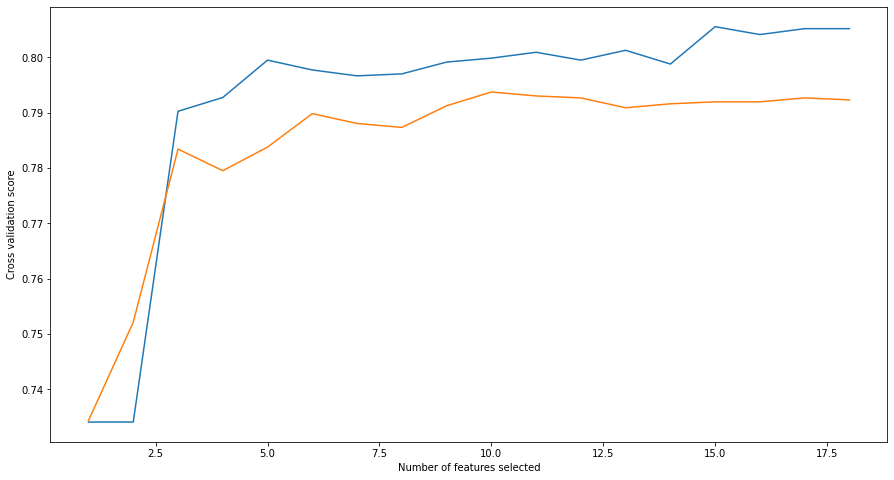

In [31]:
lr = LogisticRegression(penalty="l1",C=1,random_state=0,solver="liblinear")
fs = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
fs.fit(X_train_sc, y_train)
print("Optimal number of features : %d" % fs.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(fs.grid_scores_) + 1), fs.grid_scores_)
plt.show()